# Top Earners in Movie Industry

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="#intro"></a>
## Introduction

> This analysis project is to be done using the imdb movie data. When the analysis is completed, you should be able to find the top 5 highest grossing directors, the top 5 highest grossing movie genres of all time, comparing the revenue of the highest grossing movies and which companies released the most movies. 

> There are 10 columns that will not be needed for the analysis. Use pandas to drop these columns. HINT: Only the columns pertaining to revenue will be needed.

> To get you started, I've already placed the needed code for getting the packages and datafile that you will be using for the project. 

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('imdb-movies.csv')

### Drop columns without neccesary information and remove all records with no financial information -- Pay close attention to things that don't tell you anything regarding financial data

In [4]:
analysis = df[['id', 'popularity', 'budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']]

In [5]:
print(analysis)

           id  popularity     budget     revenue  runtime  vote_count  \
0      135397   32.985763  150000000  1513528810      124        5562   
1       76341   28.419936  150000000   378436354      120        6185   
2      262500   13.112507  110000000   295238201      119        2480   
3      140607   11.173104  200000000  2068178225      136        5292   
4      168259    9.335014  190000000  1506249360      137        2947   
...       ...         ...        ...         ...      ...         ...   
10861      21    0.080598          0           0       95          11   
10862   20379    0.065543          0           0      176          20   
10863   39768    0.065141          0           0       94          11   
10864   21449    0.064317          0           0       80          22   
10865   22293    0.035919      19000           0       74          15   

       vote_average  release_year    budget_adj   revenue_adj  
0               6.5          2015  1.379999e+08  1.392446e+

### Data Cleaning

In [6]:
# Delete all records with null, or empty values
df.dropna()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,668,tt0064757,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,http://www.mgm.com/view/movie/1411/On-Her-Maje...,Peter R. Hunt,Far up! Far out! Far more! James Bond 007 is b...,...,James Bond tracks archnemesis Ernst Blofeld to...,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,12/12/69,258,6.4,1969,4.160985e+07,4.872780e+08
10759,948,tt0077651,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,http://www.theofficialjohncarpenter.com/hallow...,John Carpenter,The Night HE Came Home!,...,"A psychotic murderer, institutionalized since ...",91,Horror|Thriller,Compass International Pictures|Falcon Internat...,10/25/78,522,7.3,1978,1.002810e+06,2.339890e+08
10760,8469,tt0077975,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,http://www.animalhouse.com/,John Landis,It was the Deltas against the rules... the rul...,...,"At a 1962 College, Dean Vernon Wormer is deter...",109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,7/27/78,230,6.7,1978,9.025292e+06,4.713208e+08
10817,13963,tt0077838,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,http://www.mgm.com/#/our-titles/1092/The-Last-...,Martin Scorsese,It Started as a Concert. It Became a Celebration.,...,Martin Scorsese's rockumentary intertwines foo...,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978,0.000000e+00,1.076189e+06


#### Here's a helpful hint from my own analysis when I ran this the first time. This may help shed light on what your data set should look like.

#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

In [7]:
p = df.drop(['genres'], axis=1)
g = df.drop(['production_companies'], axis=1)

<a id="eda"></a>
## Exploratory Data Analysis

> Use Matplotlib to display your data analysis

### Which production companies released the most movies in the last 10 years? Display the top 5 production companies.

The Asylum                                                    17
Marvel Studios                                                10
Pixar Animation Studios                                        8
WWE Studios                                                    8
DreamWorks Animation                                           7
                                                              ..
DC Comics|Warner Bros. Animation|DC Entertainment              1
WhiteFlame Productions                                         1
Warner Bros. Animation|Warner Premiere|DC Entertainment        1
Atlas Films                                                    1
School Pictures|Parting Shots Media|Logolite Entertainment     1
Name: production_companies, Length: 2079, dtype: int64


<AxesSubplot:>

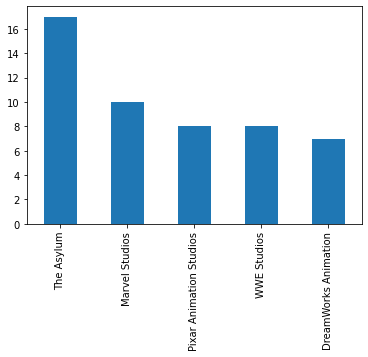

In [8]:
pc = df.query('release_year > 2011')['production_companies'].value_counts()
print(pc)
pc.sort_values(ascending=False)[:5].plot(x="production_companies", kind='bar')

### What 5 movie genres grossed the highest all-time?

                                         genres     revenue
1386   Action|Adventure|Fantasy|Science Fiction  2781505847
3      Action|Adventure|Science Fiction|Fantasy  2068178225
5231                     Drama|Romance|Thriller  1845034188
4361           Science Fiction|Action|Adventure  1519557910
0     Action|Adventure|Science Fiction|Thriller  1513528810


<AxesSubplot:xlabel='genres'>

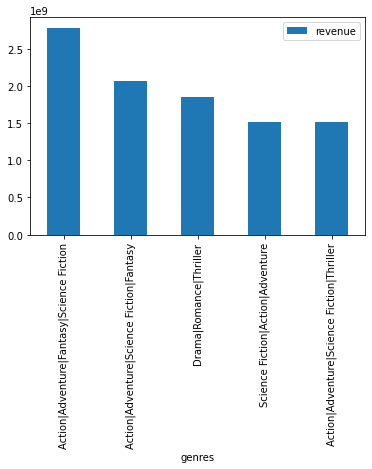

In [9]:
top_genre = df.sort_values(by=["revenue"], ascending=False)[:5][["genres", "revenue"]]
print(top_genre)
top_genre.plot(x="genres", kind='bar')


### Who are the top 5 grossing directors?

             director     revenue
1386    James Cameron  2781505847
3         J.J. Abrams  2068178225
5231    James Cameron  1845034188
4361      Joss Whedon  1519557910
0     Colin Trevorrow  1513528810


<AxesSubplot:xlabel='director'>

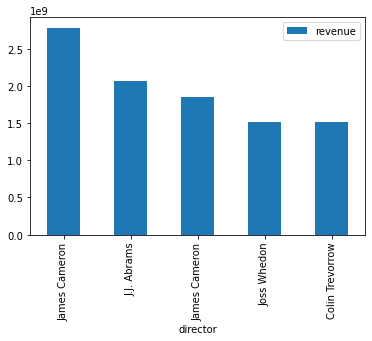

In [10]:
d = df.sort_values(by=["revenue"], ascending=False)[:5][["director", "revenue"]]
print(d)
d.plot(x="director", kind='bar')

### Compare the revenue of the highest grossing movies of all time.

<AxesSubplot:xlabel='original_title'>

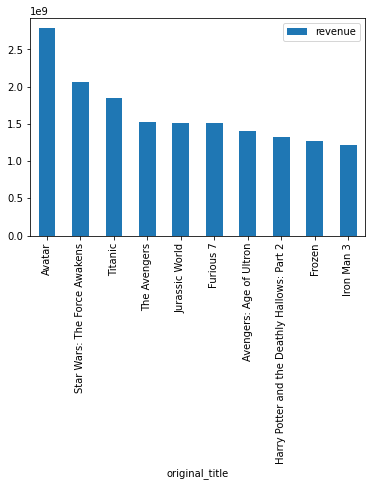

In [11]:
df[["original_title", "revenue"]].sort_values("revenue", ascending=False)[:10].plot(x="original_title", kind='bar')

<a id="conclusions"></a>
## Conclusions

> Using the cell below, write a brief conclusion of what you have found from the anaylsis of the data. The Cell below will allow you to write plan text instead of code.

Based on my analysis, the top production companies were The Asylum and Marvel Studios in terms of films produced. The top grossing genres were Action and Adventure. The top grossing directors were James Cameron and J.J. Abrams.